In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

You should consider upgrading via the 'C:\Users\user\ImageClassification\ImageClassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [80]:
import tensorflow as tf
import os

In [81]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [82]:
tf.config.list_physical_devices('GPU')

[]

# Remove low quality  images

In [83]:
import cv2
import imghdr

In [84]:
data_dir = 'data' 

In [85]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [86]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

Issue with image data\happy\.ipynb_checkpoints
Issue with image data\sad\.ipynb_checkpoints


#  Load Data

In [87]:
import numpy as np
from matplotlib import pyplot as plt

In [112]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 307 files belonging to 2 classes.


In [89]:
data_iterator = data.as_numpy_iterator()

In [90]:
batch = data_iterator.next()

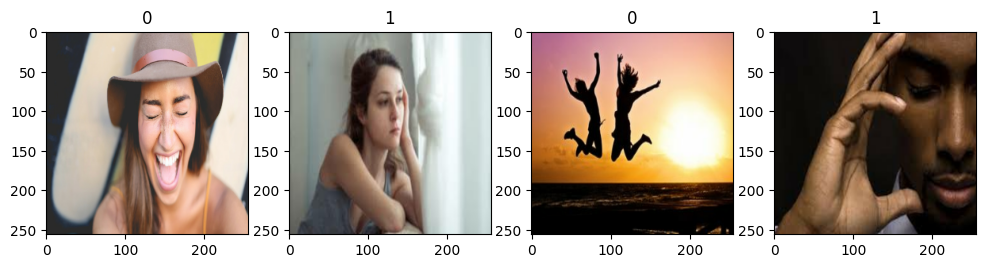

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(12,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#  Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.24255514, 0.24255514, 0.20333946],
          [0.24033605, 0.24033605, 0.20112035],
          [0.23929067, 0.23929067, 0.20007497],
          ...,
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766]],
 
         [[0.27058825, 0.27872244, 0.23616728],
          [0.26301455, 0.27114874, 0.22859359],
          [0.26664165, 0.27450982, 0.23208767],
          ...,
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766]],
 
         [[0.25918955, 0.2763311 , 0.23924471],
          [0.26484936, 0.28159186, 0.24463849],
          [0.26110685, 0.27092525, 0.23660427],
          ...,
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766]],
 
         ...,
 
         [[0.2358472 , 0.19483924, 0.1869961 ],
          [0.23090

#  Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [103]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [105]:
model = Sequential()

In [106]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [107]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# Train

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 25s 3s/step - loss: 1.3896 - accuracy: 0.5000 - val_loss: 0.6821 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 22s 3s/step - loss: 0.6875 - accuracy: 0.5714 - val_loss: 0.6669 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 21s 3s/step - loss: 0.6704 - accuracy: 0.6518 - val_loss: 0.6422 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 21s 3s/step - loss: 0.5979 - accuracy: 0.6696 - val_loss: 0.5412 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.4471 - accuracy: 0.8036 - val_loss: 0.4554 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 0.3432 - accuracy: 0.8661 - val_loss: 0.2866 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 22s 3s/step - loss: 0.3215 - accuracy: 0.8438 - val_loss: 0.2734 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

#  Plot Performance

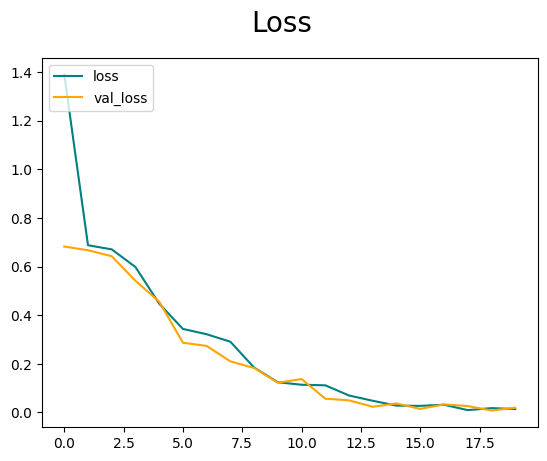

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

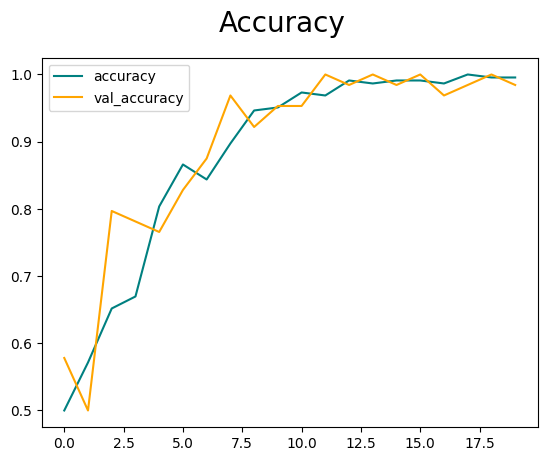

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#  Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 605ms/step


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


#  Test

In [60]:
import cv2

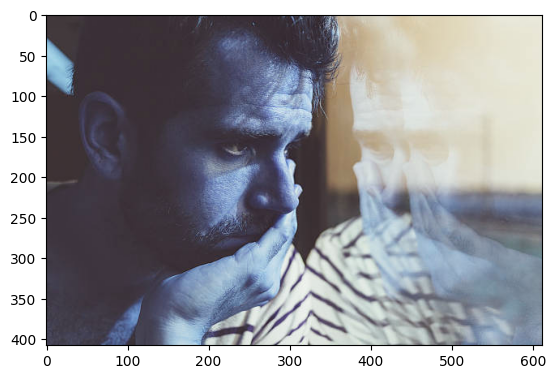

In [75]:
img = cv2.imread('123.jpg')
plt.imshow(img)
plt.show()

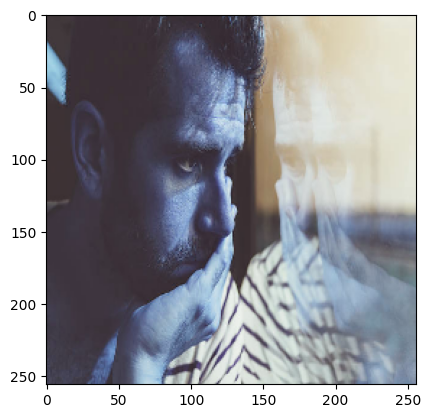

In [76]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


In [78]:
yhat

array([[0.9944442]], dtype=float32)

In [79]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
